In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np

In [2]:
max_words = 10000
max_sequence_length = 900

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step


In [4]:
y_train[0]

1

In [5]:
from tensorflow import keras

x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_sequence_length)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_sequence_length)

# If a sequence is shorter than 500 ,it pads it with zeros at the beginning (by default).
# If a sequence is longer than 500, it truncates the beginning and keeps the last 500 values.

In [6]:
# x_train[0]

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history=model.fit(x_train, y_train, batch_size=512, epochs=10, validation_data=(x_test, y_test))

C:\python 3.10.2\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 423ms/step - accuracy: 0.6651 - loss: 0.6701 - val_accuracy: 0.8101 - val_loss: 0.5331
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 411ms/step - accuracy: 0.8202 - loss: 0.4787 - val_accuracy: 0.8434 - val_loss: 0.3804
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 414ms/step - accuracy: 0.8596 - loss: 0.3445 - val_accuracy: 0.8574 - val_loss: 0.3310
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 412ms/step - accuracy: 0.8890 - loss: 0.2785 - val_accuracy: 0.8702 - val_loss: 0.3038
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 415ms/step - accuracy: 0.9073 - loss: 0.2373 - val_accuracy: 0.8698 - val_loss: 0.3032
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 431ms/step - accuracy: 0.9223 - loss: 0.2067 - val_accuracy: 0.8772 - val_loss: 0.2896
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 418ms/step - accuracy: 0.9367 - loss: 0.1775 - val_accuracy: 0.8790 - val_loss: 0.2908
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 418ms/step - accuracy: 0.9476 - loss: 0.1509 - val_accu

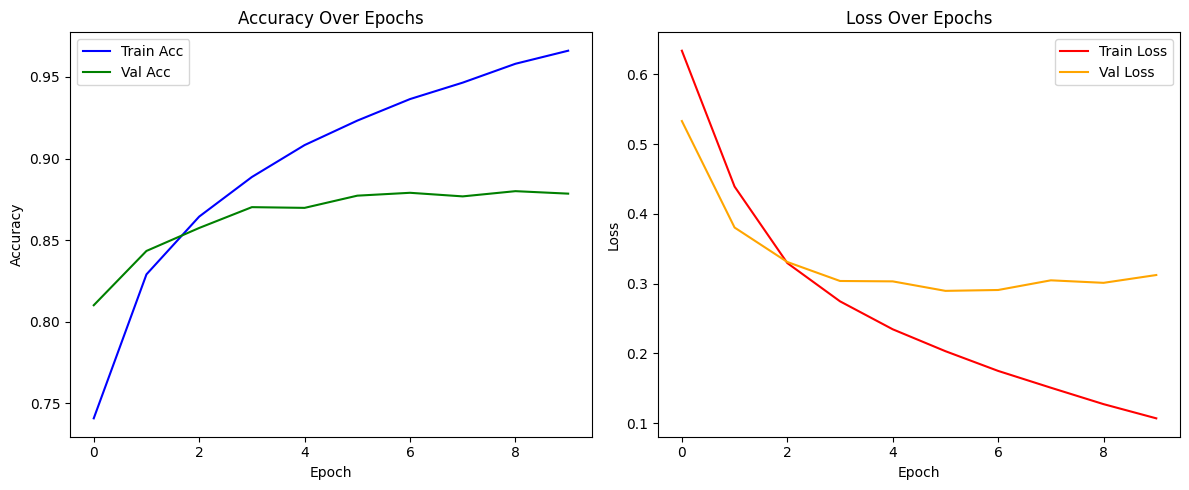

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Acc', color='green')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Evaluation

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8786 - loss: 0.3099
Test Loss: 0.3123038411140442
Test Accuracy: 0.8784800171852112


782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


<Axes: >

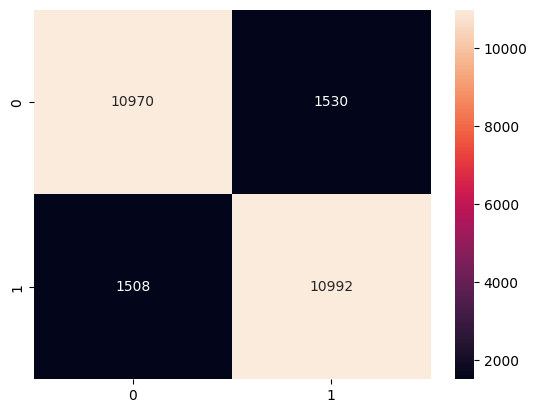

In [10]:
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype(int)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='d')

In [11]:
classification_rep = classification_report(y_test, y_pred)
print("Classificatio Report")
print(classification_rep)

Classificatio Report
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [12]:
# Sample Example

index=5

sample_review = x_test[index]
sample_review = sample_review.reshape(1, -1)

pred_prob = model.predict(sample_review)[0][0]
pred_label = int(pred_prob > 0.5)

print(f"Predicted Probability: {pred_prob}")
print("Predicted Sentiment:", "Positive" if pred_label == 1 else "Negative")
print("Actual Sentiment:","Positive" if y_test[index]==1 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Probability: 0.8765529990196228
Predicted Sentiment: Positive
Actual Sentiment: Positive
